<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/Cas_pratique_lasso_et_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Datasets/Hitters.csv")
df.head()

Mounted at /content/drive


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

line = "========="*5

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


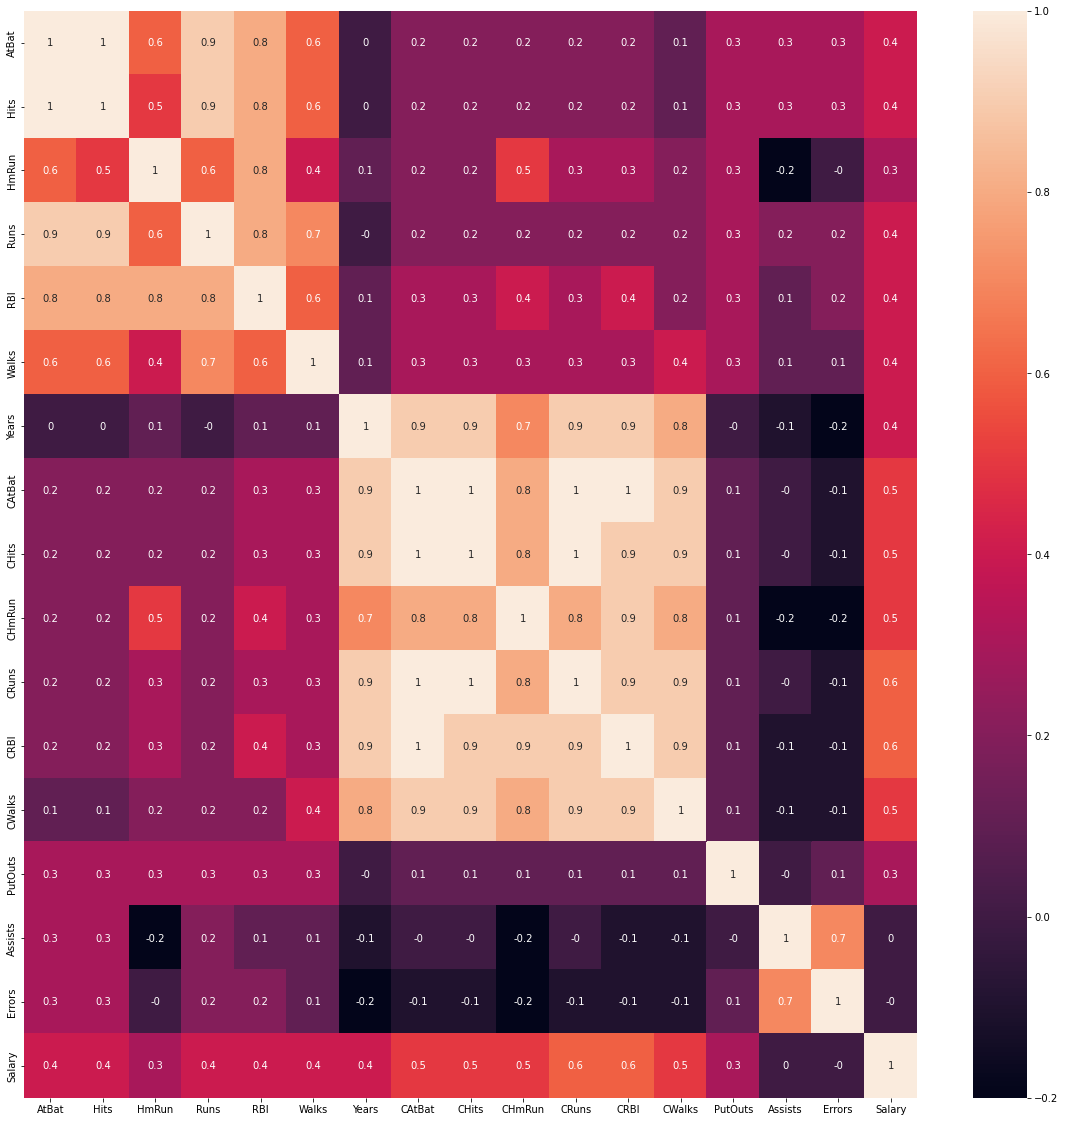

In [8]:
plt.figure(figsize=(20,20))
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)
plt.show()

Il y a de fortes corrélations (proches de 1).


Découpez l’échantillon en un échantillon d’apprentissage et de test.

In [9]:
data = df.drop(["Salary","League", "NewLeague","Division"], axis=1)
y=df["Salary"]
X=data

In [10]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

y_train

70      320.000
37       90.000
262     191.000
272     100.000
237     190.000
         ...   
291     425.000
40       67.500
54      675.000
284     530.000
112    1925.571
Name: Salary, Length: 184, dtype: float64

Implémentez sur l’échantillon d’apprentissage une régression classique et étudiez la significativité des coefficients.

In [11]:
import statsmodels.api as sm

regressor_OLS = sm.OLS(y, X)
regressor_fit = regressor_OLS.fit()

print(regressor_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              62.87
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                    1.90e-77
Time:                        16:30:01   Log-Likelihood:                         -1882.6
No. Observations:                 263   AIC:                                      3797.
Df Residuals:                     247   BIC:                                      3854.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Implémentez sur l’échantillon d’apprentissage la régression ridge et lasso sur l’échantillon d’apprentissage.



In [12]:
# Ridge
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.logspace(-2,2,100)

ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X,y)
print("Alpha ridge : ", ridgecv.alpha_)
ridge_b = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_b.fit(X_train, y_train)

Alpha ridge :  0.010974987654930561


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(

Ridge(alpha=0.010974987654930561, normalize=True)

In [13]:
# Lasso
from sklearn.linear_model import Lasso, LassoCV

lassocv = LassoCV(alphas=alphas, normalize=True)
lassocv.fit(X_train, y_train)
print(line)
print("Alpha lasso : ", lassocv.alpha_)
lasso_b = Lasso(alpha=lassocv.alpha_, normalize=True)
lasso_b.fit(X_train, y_train)

Alpha lasso :  1.6681005372000592


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3828.212326409295, tolerance: 2734.830805211197
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5832.586498981342, tolerance: 2734.830805211197
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6044.352246999741, tolerance: 2734.830805211197
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5913.1324150

Lasso(alpha=1.6681005372000592, normalize=True)

Evaluez les performances des modèles sur l’échantillon test et choisissez le meilleur modèle.

In [14]:
from sklearn.metrics import mean_squared_error

y_pred_ridge = ridge_b.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('MSE Ridge : ', mse_ridge)
print(line)

print("Best ridge coefficients : ")
pd.Series(ridge_b.coef_, index=pd.DataFrame(X).columns)

MSE Ridge :  139440.27884264395
Best ridge coefficients : 


AtBat     -1.136841
Hits       5.017563
HmRun     -3.139733
Runs       1.280184
RBI        0.656697
Walks      3.613884
Years      3.729143
CAtBat    -0.025060
CHits      0.137872
CHmRun     0.691397
CRuns      0.540515
CRBI       0.129015
CWalks    -0.461903
PutOuts    0.227471
Assists   -0.023655
Errors    -0.494217
dtype: float64

In [15]:
y_pred_lasso = lasso_b.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('MSE Lasso : ', mse_lasso)
print(line)

print("Best lasso coefficients : ")
pd.Series(lasso_b.coef_, index=pd.DataFrame(X).columns)

MSE Lasso :  153794.5048147957
Best lasso coefficients : 


AtBat      0.000000
Hits       2.598247
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      1.138552
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.331433
CRBI       0.257956
CWalks     0.000000
PutOuts    0.171308
Assists   -0.000000
Errors    -0.000000
dtype: float64

In [16]:
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install regressors
from regressors import stats

print("coef_pval:\n", pd.Series(stats.coef_pval(ridge_b, X_train, y_train)))
print(line)
print("coef_pval:\n", pd.Series(stats.coef_pval(lasso_b, X_train, y_train)))

coef_pval:
 0     0.568655
1     0.000160
2     0.028821
3     0.627715
4     0.674035
5     0.776830
6     0.073120
7     0.756483
8     0.558396
9     0.783050
10    0.650204
11    0.377814
12    0.770857
13    0.078073
14    0.001972
15    0.896531
16    0.918488
dtype: float64
coef_pval:
 0     0.582654
1     1.000000
2     0.271357
3     1.000000
4     1.000000
5     1.000000
6     0.583599
7     1.000000
8     1.000000
9     1.000000
10    1.000000
11    0.600774
12    0.573481
13    1.000000
14    0.023373
15    1.000000
16    1.000000
dtype: float64


le lasso met à zero les coefficients des variables qui etaient pas significatives lors du ols simple et en plus fait pareil pour les variables très liées entre elles (elimine la multi colinéarité)